# Importation des données

In [14]:
import pandas as pd

# Remplacez 'chemin/vers/votre/fichier.csv' par le chemin de votre fichier CSV
fichier_csv = '/content/sample_data/Data.csv'

# Importation du fichier CSV
df1 = pd.read_csv(fichier_csv)

# Supprimer la colonne 'Code'
df1 = df1.drop('Code', axis=1)
df1 = df1.drop('Population', axis=1)
df1 = df1.drop('Libellé', axis=1)

# Définir la colonne 'Libellé' comme nouvel index du DataFrame
#df1 = df1.set_index('Libellé')

print(df1.head(5))
#df1.describe()


   Densité de population 2020  Potentiel financier 2023  \
0                       53.87                    413451   
1                       30.97                    139410   
2                       38.00                    141594   
3                       24.31                    192021   
4                       81.73                    754568   

   Médiane du revenu disponible par UC 2020  \
0                                     17770   
1                                     22990   
2                                     21770   
3                                     18460   
4                                     21650   

   Part des ménages disposant d'au moins une voiture 2020  \
0                                               89.4        
1                                               93.8        
2                                               93.6        
3                                               88.4        
4                                               96.6     

On soustrait la moyenne

In [15]:
# Calcul de la moyenne de chaque colonne
mean_values = df1.mean()

# Soustraction de cette moyenne de chaque élément de la colonne correspondante
df_centered = df1.subtract(mean_values, axis='columns')
#df_centered.describe()
#print(df_centered.head(5))


Normalisation

In [16]:
# Normalisation min-max pour chaque colonne
df_normalized = df1.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
#print(df_normalized.head(5))
df_normalized.describe()


,Densité de population 2020,Potentiel financier 2023,Médiane du revenu disponible par UC 2020,Part des ménages disposant d'au moins une voiture 2020,Part des ménages dont la famille principale est une famille monoparentale 2020,Part des personnes de 75 ans et plus vivant seules 2020\nEnsemble,Part des diplomés du supérieur parmi les 15 ans et plus non scolarisés 2020\nEnsemble,Part des non diplomés parmi les 15 ans et plus non scolarisés 2020\nEnsemble,Indice de vieillissement 2020,Temps d'accès au chef lieu de proximité,Temps d'accès aux bibliothèques,Temps d'accès aux collèges,"Part des ""cadres et professions intellectuelles supérieures"" dans la population 2020\nEnsemble","Part des ""ouvriers"" dans la population 2020\nEnsemble",Taux de chômage des 15 ans et plus (RP) 2020,Densité de logements sociaux
count,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000
mean,0.069905,0.015140,0.496597,0.252931,0.083871,0.333640,0.370180,0.346314,0.085578,0.217408,0.184758,0.366711,0.174892,0.277820,0.314490,0.099247
std,0.103313,0.072650,0.146725,0.078082,0.087190,0.282737,0.128433,0.120819,0.102898,0.164583,0.301307,0.242703,0.170061,0.182761,0.153297,0.189731
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010064,0.001177,0.378360,0.215938,0.000000,0.000000,0.275542,0.273026,0.042174,0.091010,0.000000,0.285714,0.000000,0.163043,0.218000,0.000000
50%,0.029564,0.003368,0.482527,0.251928,0.078000,0.323000,0.359133,0.332237,0.057391,0.176058,0.000000,0.285714,0.154717,0.285326,0.288000,0.000000
75%,0.088819,0.009436,0.602823,0.281063,0.117000,0.490000,0.438080,0.411184,0.091304,0.307868,0.333333,0.642857,0.241509,0.377717,0.388000,0.137543
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Inversion pour les colonnes négatives

In [17]:
col_negatives = ['Taux de chômage des 15 ans et plus (RP) 2020', 'Part des ménages dont la famille principale est une famille monoparentale 2020', 'Part des personnes de 75 ans et plus vivant seules 2020\nEnsemble', 'Part des non diplomés parmi les 15 ans et plus non scolarisés 2020\nEnsemble', 'Indice de vieillissement 2020', "Temps d'accès au chef lieu de proximité", "Temps d'accès aux bibliothèques", "Temps d'accès aux collèges", 'Part des "ouvriers" dans la population 2020\nEnsemble']  # Remplacez par les noms de vos colonnes

# Inverser les valeurs pour les colonnes avec connotation négative
for col in col_negatives:
    df_normalized[col] = 1 - df_normalized[col]
df_normalized.describe()


,Densité de population 2020,Potentiel financier 2023,Médiane du revenu disponible par UC 2020,Part des ménages disposant d'au moins une voiture 2020,Part des ménages dont la famille principale est une famille monoparentale 2020,Part des personnes de 75 ans et plus vivant seules 2020\nEnsemble,Part des diplomés du supérieur parmi les 15 ans et plus non scolarisés 2020\nEnsemble,Part des non diplomés parmi les 15 ans et plus non scolarisés 2020\nEnsemble,Indice de vieillissement 2020,Temps d'accès au chef lieu de proximité,Temps d'accès aux bibliothèques,Temps d'accès aux collèges,"Part des ""cadres et professions intellectuelles supérieures"" dans la population 2020\nEnsemble","Part des ""ouvriers"" dans la population 2020\nEnsemble",Taux de chômage des 15 ans et plus (RP) 2020,Densité de logements sociaux
count,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000
mean,0.069905,0.015140,0.496597,0.252931,0.916129,0.666360,0.370180,0.653686,0.914422,0.782592,0.815242,0.633289,0.174892,0.722180,0.685510,0.099247
std,0.103313,0.072650,0.146725,0.078082,0.087190,0.282737,0.128433,0.120819,0.102898,0.164583,0.301307,0.242703,0.170061,0.182761,0.153297,0.189731
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010064,0.001177,0.378360,0.215938,0.883000,0.510000,0.275542,0.588816,0.908696,0.692132,0.666667,0.357143,0.000000,0.622283,0.612000,0.000000
50%,0.029564,0.003368,0.482527,0.251928,0.922000,0.677000,0.359133,0.667763,0.942609,0.823942,1.000000,0.714286,0.154717,0.714674,0.712000,0.000000
75%,0.088819,0.009436,0.602823,0.281063,1.000000,1.000000,0.438080,0.726974,0.957826,0.908990,1.000000,0.714286,0.241509,0.836957,0.782000,0.137543
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

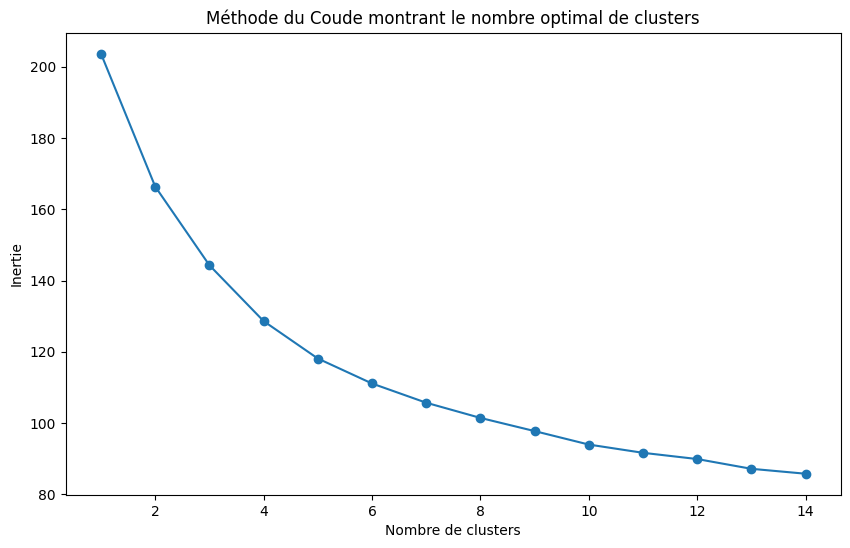

In [18]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Supposons que df_normalized est votre DataFrame normalisé
# Application de la méthode du coude pour trouver le nombre optimal de clusters
inertia = []
K_range = range(1, 15)  # Tester de 1 à 14 clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

# Affichage du graphique du coude
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du Coude montrant le nombre optimal de clusters')
plt.show()


On choisit 5 cluster

In [19]:
from sklearn.cluster import KMeans

# Nombre de clusters choisi
n_clusters = 5

# Application de K-Means avec 5 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(df_normalized)

# Récupération des labels des clusters pour chaque point de données
clusters = kmeans.labels_

# Ajout des labels des clusters au DataFrame original (si nécessaire)
df_normalized['Cluster'] = clusters

# Affichage des centres de chaque cluster
print("Centres des clusters :\n", kmeans.cluster_centers_)

# Si vous souhaitez visualiser les résultats, vous pouvez utiliser une PCA pour réduire les dimensions (si plus de 2 dimensions)
# et afficher un graphique. Cela dépend de la dimensionnalité de vos données.

Centres des clusters :
 [[ 1.99904193e-01  8.68782617e-02  5.10323497e-01  2.13250760e-01
   9.02954545e-01  6.07000000e-01  3.05973825e-01  6.04104366e-01
   9.38942688e-01  8.49501562e-01  9.46969697e-01  8.12770563e-01
   1.47855918e-01  6.85523715e-01  6.72636364e-01  5.61979003e-01]
 [ 1.87907623e-02  2.53828093e-03  4.55566518e-01  2.31070758e-01
   9.30638298e-01  1.34553191e-01  4.00928793e-01  6.78086506e-01
   8.97613321e-01  7.51442650e-01  8.93617021e-01  4.59979737e-01
   2.15335207e-01  7.73704903e-01  6.95531915e-01  3.00191416e-02]
 [ 9.06308795e-02  1.10195272e-02  5.79075575e-01  2.61638178e-01
   9.13753555e-01  7.12052133e-01  3.64334659e-01  6.67350025e-01
   9.42435607e-01  8.54399760e-01  9.16271722e-01  7.77928233e-01
   1.91487079e-01  6.74788790e-01  7.22881517e-01  6.46411060e-02]
 [ 9.16676880e-03  1.38891177e-03  4.00542552e-01  2.95901519e-01
   9.08341463e-01  7.14341463e-01  4.49935815e-01  6.93717908e-01
   8.98260870e-01  6.70152888e-01 -2.22044605e-16

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
print(df_normalized.head(5))


   Densité de population 2020  Potentiel financier 2023  \
0                    0.074135                  0.007651   
1                    0.042169                  0.002424   
2                    0.051982                  0.002466   
3                    0.032873                  0.003427   
4                    0.113023                  0.014157   

   Médiane du revenu disponible par UC 2020  \
0                                  0.402554   
1                                  0.753360   
2                                  0.671371   
3                                  0.448925   
4                                  0.663306   

   Part des ménages disposant d'au moins une voiture 2020  \
0                                           0.223650        
1                                           0.261354        
2                                           0.259640        
3                                           0.215081        
4                                           0.285347     

# Ajout de la colonne score en %

In [21]:
# Ajout d'une colonne "Score" qui est la somme de toutes les valeurs dans chaque ligne
df_normalized['Score'] = df_normalized.sum(axis=1)
# Conversion des scores en pourcentage
df_normalized['Score'] = (df_normalized['Score'] / 16) * 100

df_normalized.describe()


,Densité de population 2020,Potentiel financier 2023,Médiane du revenu disponible par UC 2020,Part des ménages disposant d'au moins une voiture 2020,Part des ménages dont la famille principale est une famille monoparentale 2020,Part des personnes de 75 ans et plus vivant seules 2020\nEnsemble,Part des diplomés du supérieur parmi les 15 ans et plus non scolarisés 2020\nEnsemble,Part des non diplomés parmi les 15 ans et plus non scolarisés 2020\nEnsemble,Indice de vieillissement 2020,Temps d'accès au chef lieu de proximité,Temps d'accès aux bibliothèques,Temps d'accès aux collèges,"Part des ""cadres et professions intellectuelles supérieures"" dans la population 2020\nEnsemble","Part des ""ouvriers"" dans la population 2020\nEnsemble",Taux de chômage des 15 ans et plus (RP) 2020,Densité de logements sociaux,Cluster,Score
count,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000
mean,0.069905,0.015140,0.496597,0.252931,0.916129,0.666360,0.370180,0.653686,0.914422,0.782592,0.815242,0.633289,0.174892,0.722180,0.685510,0.099247,2.198614,65.418246
std,0.103313,0.072650,0.146725,0.078082,0.087190,0.282737,0.128433,0.120819,0.102898,0.164583,0.301307,0.242703,0.170061,0.182761,0.153297,0.189731,1.185287,7.465506
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.236103
25%,0.010064,0.001177,0.378360,0.215938,0.883000,0.510000,0.275542,0.588816,0.908696,0.692132,0.666667,0.357143,0.000000,0.622283,0.612000,0.000000,2.000000,60.896614
50%,0.029564,0.003368,0.482527,0.251928,0.922000,0.677000,0.359133,0.667763,0.942609,0.823942,1.000000,0.714286,0.154717,0.714674,0.712000,0.000000,2.000000,66.843299
75%,0.088819,0.009436,0.602823,0.281063,1.000000,1.000000,0.438080,0.726974,0.957826,0.908990,1.000000,0.714286,0.241509,0.836957,0.782000,0.137543,3.000000,70.569242
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,83.268466


In [22]:
# Affichage des 5 lignes avec le score le plus élevé
top_5_scores = df_normalized.nlargest(5, 'Score')
print(top_5_scores)
df = df_normalized

     Densité de population 2020  Potentiel financier 2023  \
331                    0.007663                  0.000316   
76                     0.025028                  0.002209   
431                    0.008668                  0.000288   
379                    0.017351                  0.001041   
243                    0.006547                  0.000960   

     Médiane du revenu disponible par UC 2020  \
331                                  0.351815   
76                                   0.393145   
431                                  0.346169   
379                                  0.430040   
243                                  0.385820   

     Part des ménages disposant d'au moins une voiture 2020  \
331                                           0.485861        
76                                            0.286204        
431                                           0.357326        
379                                           0.228792        
243                    

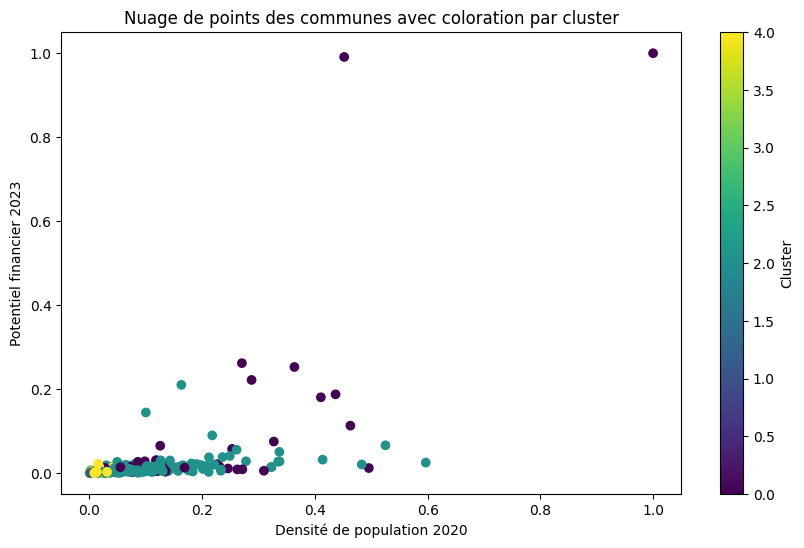

In [31]:
import matplotlib.pyplot as plt

# Création du nuage de points
plt.figure(figsize=(10, 6))
plt.scatter(df_normalized['Densité de population 2020'], df_normalized['Potentiel financier 2023'], c=df_normalized['Cluster'], cmap='viridis')
plt.xlabel('Densité de population 2020')
plt.ylabel('Potentiel financier 2023')
plt.title('Nuage de points des communes avec coloration par cluster')
plt.colorbar(label='Cluster')
plt.show()


In [29]:
import pandas as pd

# Assignation des labels des clusters à votre DataFrame
df_normalized['Cluster'] = kmeans.labels_

# Comptage du nombre de communes dans chaque cluster
cluster_counts = df_normalized['Cluster'].value_counts()

# Affichage du nombre de communes dans chaque cluster
print(cluster_counts)


2    211
4     90
1     47
0     44
3     41
Name: Cluster, dtype: int64


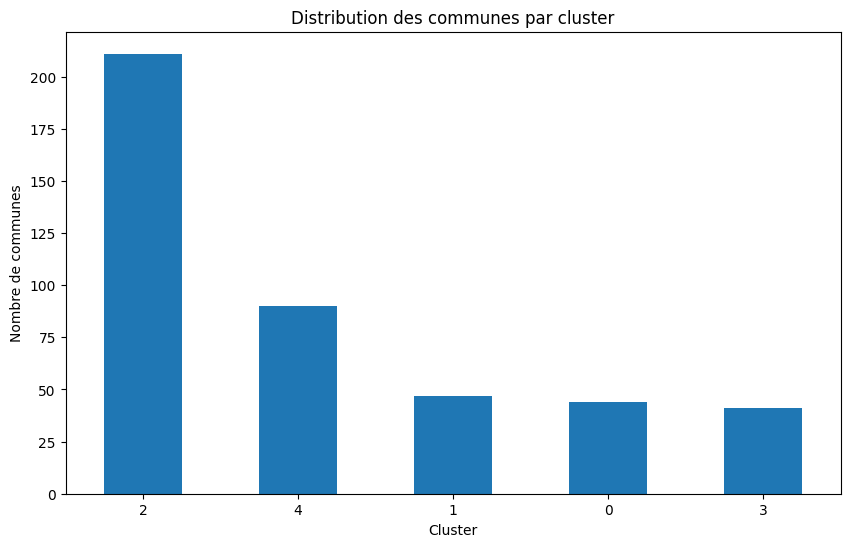

In [30]:
import matplotlib.pyplot as plt

# Création de l'histogramme
plt.figure(figsize=(10, 6))
df_normalized['Cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Nombre de communes')
plt.title('Distribution des communes par cluster')
plt.xticks(rotation=0)  # Pour rendre les étiquettes sur l'axe des x horizontales
plt.show()


Renommer

In [23]:
df = df.rename(columns={'Densité de population 2020': 'Densité population'})
df = df.rename(columns={'Potentiel financier 2023': 'Potentiel financier'})
df = df.rename(columns={'Médiane du revenu disponible par UC 2020': 'Médiane revenu'})
df = df.rename(columns={"Part des ménages disposant d/'au moins une voiture 2020": 'Ménages avec 1 voiture'})
df = df.rename(columns={'Part des ménages dont la famille principale est une famille monoparentale 2020': 'Ménages monoparentale'})
df = df.rename(columns={'Part des personnes de 75 ans et plus vivant seules 2020\nEnsemble': '75 ans et plus vivant seules'})
df = df.rename(columns={'Part des diplomés du supérieur parmi les 15 ans et plus non scolarisés 2020\nEnsemble': 'diplomés'})
df = df.rename(columns={'Part des non diplomés parmi les 15 ans et plus non scolarisés 2020\nEnsemble': 'non diplomés'})
df = df.rename(columns={'Indice de vieillissement 2020': 'Indice vieillissement'})
df = df.rename(columns={"Temps d'accès au chef lieu de proximité": 'Temps chef lieu'})
df = df.rename(columns={"Temps d'accès aux bibliothèques": 'Temps bibliothèques'})
df = df.rename(columns={"Temps d'accès aux collèges": 'Temps collèges'})
df = df.rename(columns={'Part des "cadres et professions intellectuelles supérieures" dans la population 2020\nEnsemble': 'Part cadres'})
df = df.rename(columns={'Part des "ouvriers" dans la population 2020\nEnsemble': 'Part ouvriers'})
df = df.rename(columns={'Taux de chômage des 15 ans et plus (RP) 2020': 'Taux chômage 15 ans et plus'})
df = df.rename(columns={'Densité de logements sociaux': 'Densité logements sociaux'})

In [24]:
import pandas as pd

# Remplacez 'chemin/vers/votre/fichier.csv' par le chemin de votre fichier CSV
fichier_csv = '/content/sample_data/Data.csv'

# Importation du fichier CSV
df1 = pd.read_csv(fichier_csv)

# Supprimer la colonne 'Code'
df1 = df1.drop('Code', axis=1)
df1 = df1.drop('Population', axis=1)

# Définir la colonne 'Libellé' comme nouvel index du DataFrame
#df1 = df1.set_index('Libellé')

#print(df1.head(5))
#df1.describe()

In [25]:
df_final = pd.concat([df1[['Libellé']], df], axis=1)
df_final

,Libellé,Densité population,Potentiel financier,Médiane revenu,Part des ménages disposant d'au moins une voiture 2020,Ménages monoparentale,75 ans et plus vivant seules,diplomés,non diplomés,Indice vieillissement,Temps chef lieu,Temps bibliothèques,Temps collèges,Part cadres,Part ouvriers,Taux chômage 15 ans et plus,Densité logements sociaux,Cluster,Score
0,Aigues-Vives,0.074135,0.007651,0.402554,0.223650,0.902,0.500,0.253870,0.491776,0.958696,0.949205,1.000000,0.714286,0.000000,0.559783,0.710,0.000000,2,60.922530
1,Airoux,0.042169,0.002424,0.753360,0.261354,1.000,0.667,0.674923,0.800987,0.972174,0.959902,0.666667,0.714286,0.422642,0.695652,0.750,0.000000,2,71.147116
2,Ajac,0.051982,0.002466,0.671371,0.259640,1.000,0.600,0.286378,0.654605,0.895217,0.595745,1.000000,0.714286,0.211321,0.622283,0.660,0.000000,2,63.908082
3,Alaigne,0.032873,0.003427,0.448925,0.215081,0.839,0.400,0.352941,0.621711,0.893478,0.934124,1.000000,0.714286,0.067925,0.611413,0.712,0.000000,2,61.544900
4,Alairac,0.113023,0.014157,0.663306,0.285347,0.908,0.413,0.427245,0.792763,0.970870,0.964461,1.000000,0.904762,0.309434,0.720109,0.760,0.487457,0,60.837084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,Villesèquelande,0.233501,0.008749,0.684140,0.282776,0.922,0.815,0.385449,0.756579,0.972174,0.927461,1.000000,0.904762,0.166038,0.532609,0.808,0.180796,2,72.375206
429,Villesiscle,0.096343,0.003943,0.627016,0.272494,0.901,0.636,0.396285,0.754934,0.964783,0.821019,1.000000,1.000000,0.000000,0.546196,0.868,0.000000,2,68.050078
430,Villespy,0.088205,0.004123,0.582661,0.258783,0.892,0.625,0.380805,0.764803,0.968696,0.864625,0.666667,0.714286,0.498113,0.763587,0.652,0.000000,2,67.027209
431,Villetritouls,0.008668,0.000288,0.346169,0.357326,1.000,1.000,0.407121,0.710526,1.000000,0.916589,1.000000,0.357143,0.000000,1.000000,0.818,0.000000,4,80.761445


In [26]:
#df_final = df_final.drop('Score', axis=1)
# Enregistrement de df_final en fichier CSV
nom_fichier_csv = 'data_calculator.csv'  # Remplacez par votre chemin de fichier désiré
df_final.to_csv(nom_fichier_csv, index=False)  # index=False pour ne pas inclure l'index dans le fichier CSV


# Remplacer les NA en texte par des NA

In [27]:
df2 = df1
import numpy as np

# Définir les formats de NA
na_formats = ['N/A - résultat non disponible', 'N/A - division par 0']

# 1. Compter le nombre de valeurs NA par ligne
df2['na_count'] = df2.apply(lambda x: x.isin(na_formats).sum(), axis=1)

# 2. Remplacer tous les formats de NA par np.nan
for na_val in na_formats:
    df2.replace(na_val, np.nan, inplace=True)

# Remplacement des 0 par la moyenne

In [28]:
# Remplacement des 0 par la moyenne de la colonne respective
for col in df1.columns:
    df1[col] = df1[col].replace(0, moyennes[col])

NameError: name 'moyennes' is not defined

# Normalisation des données

In [ ]:
# Normalisation des données en utilisant la méthode Min-Max
#normalized_df = (df1 - df1.min()) / (df1.max() - df1.min())
#df = normalized_df

In [ ]:
normalized_df = df1.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df = normalized_df

# Renommer les colonnes

In [ ]:
df = df.rename(columns={'Densité de population 2020': 'Densité population'})
df = df.rename(columns={'Potentiel financier 2023': 'Potentiel financier'})
df = df.rename(columns={'Médiane du revenu disponible par UC 2020': 'Médiane revenu'})
df = df.rename(columns={"Part des ménages disposant d/'au moins une voiture 2020": 'Ménages avec 1 voiture'})
df = df.rename(columns={'Part des ménages dont la famille principale est une famille monoparentale 2020': 'Ménages monoparentale'})
df = df.rename(columns={'Part des personnes de 75 ans et plus vivant seules 2020\nEnsemble': '75 ans et plus vivant seules'})
df = df.rename(columns={'Part des diplomés du supérieur parmi les 15 ans et plus non scolarisés 2020\nEnsemble': 'diplomés'})
df = df.rename(columns={'Part des non diplomés parmi les 15 ans et plus non scolarisés 2020\nEnsemble': 'non diplomés'})
df = df.rename(columns={'Indice de vieillissement 2020': 'Indice vieillissement'})
df = df.rename(columns={"Temps d'accès au chef lieu de proximité": 'Temps chef lieu'})
df = df.rename(columns={"Temps d'accès aux bibliothèques": 'Temps bibliothèques'})
df = df.rename(columns={"Temps d'accès aux collèges": 'Temps collèges'})
df = df.rename(columns={'Part des "cadres et professions intellectuelles supérieures" dans la population 2020\nEnsemble': 'Part cadres'})
df = df.rename(columns={'Part des "ouvriers" dans la population 2020\nEnsemble': 'Part ouvriers'})
df = df.rename(columns={'Taux de chômage des 15 ans et plus (RP) 2020': 'Taux chômage 15 ans et plus'})
df = df.rename(columns={'Densité de logements sociaux': 'Densité logements sociaux'})

# Radar plot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Exclure les colonnes "code" et "libellé" du DataFrame
cols_to_exclude = ["Code", "Libellé"]
df_for_plot = df.drop(cols_to_exclude, axis=1)

# Sélectionnez la ligne que vous souhaitez tracer (par exemple, la première ligne)
ligne = df_for_plot.iloc[1]

# Préparation des données pour le radar plot
labels = np.array(df_for_plot.columns)
stats = ligne.values

# Nombre de variables
num_vars = len(labels)

# Calcul de l'angle de chaque axe
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Le graphique est circulaire, donc nous devons "compléter la boucle"
stats = np.concatenate((stats, [stats[0]]))
angles += angles[:1]
labels = np.concatenate((labels, [labels[0]]))  # S'assurer que les labels forment une boucle complète

# Initialisation du radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Dessin des lignes
ax.fill(angles, stats, 'b', alpha=0.25)
ax.plot(angles, stats, 'o-', linewidth=2)

# Affectation des labels
ax.set_thetagrids(np.degrees(angles), labels)

# Affichage du radar plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Exclure les colonnes non numériques
cols_to_exclude = ["Code", "Libellé"]
df_for_plot = df.drop(cols_to_exclude, axis=1)

# Calculer la moyenne de chaque colonne
ligne_moyenne = df_for_plot.mean()

# Préparation des données pour le radar plot
labels = np.array(df_for_plot.columns)
stats = ligne_moyenne.values

# Nombre de variables
num_vars = len(labels)

# Calcul de l'angle de chaque axe
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Fermeture de la boucle pour le graphique
stats = np.concatenate((stats, [stats[0]]))
angles += angles[:1]
labels = np.concatenate((labels, [labels[0]]))  # Compléter la boucle des labels

# Initialisation du radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Dessin des lignes
ax.fill(angles, stats, 'b', alpha=0.25)
ax.plot(angles, stats, 'o-', linewidth=2)

# Affectation des labels
ax.set_thetagrids(np.degrees(angles), labels)

# Affichage du radar plot
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact

# Supposons que df est votre DataFrame

# Exclure les colonnes "Code" et "Libellé"
cols_to_exclude = ["Code", "Libellé"]
df_for_plot = df.drop(cols_to_exclude, axis=1)

# Fonction pour créer et afficher le radar plot
def plot_radar(row_index):
    ligne = df_for_plot.iloc[row_index]
    df_for_radar = pd.DataFrame(dict(
        r=ligne,
        theta=df_for_plot.columns
    ))
    fig = px.line_polar(df_for_radar, r='r', theta='theta', line_close=True)
    fig.update_traces(fill='toself')
    fig.show()

# Création du menu déroulant pour la sélection de la ligne
row_selector = widgets.Dropdown(
    options=[(f'Ligne {i}', i) for i in range(len(df_for_plot))],
    value=0,
    description='Sélectionner la Ligne:',
)

# Utiliser 'interact' pour créer un widget interactif
interact(plot_radar, row_index=row_selector)


In [ ]:
import plotly.graph_objs as go
import ipywidgets as widgets
import numpy as np

# Assurez-vous que df est défini et contient les bonnes données
try:
    df_for_plot = df.drop(["Code", "Libellé"], axis=1)
    labels = np.array(df_for_plot.columns)
    print("DataFrame prêt pour le plot.")
except Exception as e:
    print(f"Erreur lors de la préparation du DataFrame: {e}")

# Fonction pour créer le radar plot
def plot_radar(row):
    try:
        stats = df_for_plot.iloc[row].values
        stats = np.concatenate((stats, [stats[0]]))  # Fermer la boucle du radar
        labels_extended = np.concatenate((labels, [labels[0]]))

        data = go.Scatterpolar(
            r=stats,
            theta=labels_extended,
            fill='toself'
        )

        layout = go.Layout(
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[min(stats), max(stats)]
                )
            ),
            showlegend=False
        )

        fig = go.Figure(data=data, layout=layout)
        fig.show()
        print("Radar plot affiché.")
    except Exception as e:
        print(f"Erreur lors de la création du radar plot: {e}")

# Vérifier la longueur de df_for_plot
try:
    row_options = [(f'Ligne {i}', i) for i in range(len(df_for_plot))]
    print(f"Options de lignes créées : {row_options[:5]}...")  # Afficher les 5 premières options
except Exception as e:
    print(f"Erreur lors de la création des options de lignes: {e}")

# Widget pour sélectionner la ligne
try:
    row_selector = widgets.Dropdown(
        options=row_options,
        value=0,
        description='Choisir ligne:'
    )
    print("Widget Dropdown créé.")
except Exception as e:
    print(f"Erreur lors de la création du widget: {e}")

# Interaction avec le widget
try:
    widgets.interactive(plot_radar, row=row_selector)
    print("Interaction établie.")
except Exception as e:
    print(f"Erreur lors de la création de l'interaction: {e}")


In [ ]:
# Exemple de données
# df1 = pd.DataFrame({
#     'Catégorie1': [1, 2, 3],
#     'Catégorie2': [2, 3, 4],
#     'Catégorie3': [3, 4, 5],
#     ...
# })

categories = list(df1)[1:]  # Remplacer par les noms de vos catégories

fig = go.Figure()

# Ajouter une trace pour chaque ligne/entité dans le DataFrame
for index, row in df1.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[categories],
        theta=categories,
        fill='toself',
        name='Entité ' + str(index)  # ou un autre identifiant de votre choix
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 5]  # Ajuster en fonction de vos données
        )),
    showlegend=True
)

fig.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Supposons que df1 est votre DataFrame

# Sélection de quelques colonnes pour le radar plot
colonnes = ['Densité de population 2020', 'Potentiel financier 2023',
            'Médiane du revenu disponible par UC 2020',
            'Part des ménages disposant d\'au moins une voiture 2020',
            'Taux de chômage des 15 ans et plus (RP) 2020']

# Normalisation des données (important si les échelles sont différentes)
df_normalized = df1[colonnes].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Création du radar plot
fig = go.Figure()

for index, row in df_normalized.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row.values,
        theta=colonnes,
        fill='toself',
        name=df1.loc[index, 'Libellé']  # Utilisation du nom de la commune comme légende
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True
        )),
    showlegend=True
)

fig.show()
